In [153]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
mem = Memory("./mycache2")

@mem.cache
#load data
def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0], data[1]

X, y = get_data()
X = X.toarray()
#X = [X,1]
addone= np.ones(X.shape[0])
X= np.column_stack((X,addone))

In [154]:
#divide data to traning part and validation part
from sklearn.model_selection import train_test_split
from numpy import random
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=25)

In [155]:
N=X_train.shape[1]
#Normal distribution initialized
W_nor = np.random.normal(size=N)
print(W.shape)
print(W)

(15,)
[-0.01193461 -0.09007815 -0.129933    0.27309066  0.17140973  0.12869607
  0.01674958  1.08600267  0.08012581  0.25200342 -0.01647716  0.16607495
 -0.56155061  0.00843211 -0.34695174]


In [156]:
#calculate the loss
def cal_Loss(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    diifY[diifY < 0] =0
    Loss =np.sum(diifY) / X.shape[0] + np.dot(W_0,W_0.T)/2*lambdal
    return Loss

#calculate the gradient
def cal_G(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    y_get = y.copy()
    y_get[diifY <= 0] =0
    G = -np.dot(y_get,X) / X.shape[0] + W_0 *lambdal
    return G

#calculate the accuracy
def cal_Accuracy(X,W,y):
    preY = np.dot(X,W)
    count = np.sum(preY * y >0)
    Accuracy = count / X.shape[0]
    return Accuracy

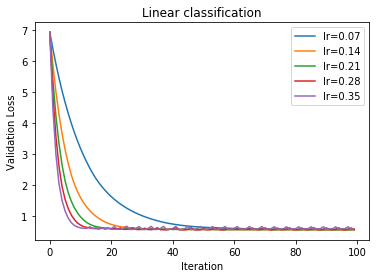

In [158]:
iteration = 100
lambdal = 0.5

for lr in [0.07,0.14,0.21,0.28,0.35]:
    W = W_nor
    Loss_train = np.zeros(iteration)
    Loss_validation = np.zeros(iteration)
    Accuracy = np.zeros(iteration)
    for j in range(0,iteration):
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j] = cal_Loss(X_train,W,y_train,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_train,W,y_train,lambdal,W_0)
        #the validation loss
        Loss_validation[j] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        Accuracy[j] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W
        W = W - G * lr
    lstr="lr="+ str(lr)   
    plt.plot(Loss_validation,label=lstr)
    plt.legend()
plt.title("Linear classification")
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.show()  

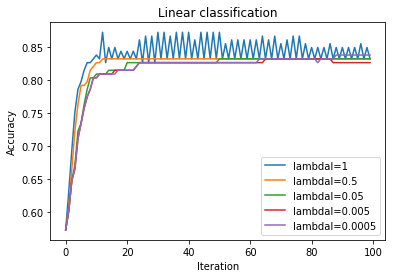

In [157]:
plt.close()
iteration = 100
lr = 0.21
for lambdal in [1,0.5,0.05,0.005,0.0005]:
    W = W_nor
    Loss_train = np.zeros(iteration)
    Loss_validation = np.zeros(iteration)
    Accuracy = np.zeros(iteration)
    for j in range(0,iteration):
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j] = cal_Loss(X_train,W,y_train,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_train,W,y_train,lambdal,W_0)
        #the validation loss
        Loss_validation[j] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        Accuracy[j] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W
        W = W - G * lr
    lstr="lambdal="+ str(lambdal)   
    plt.plot(Accuracy,label=lstr)
    plt.legend()
plt.title("Linear classification")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()  

In [159]:
def draw_plot(Loss_train,Loss_validation,Accuracy):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(Loss_train,label="Loss_train")
    ax1.plot(Loss_validation,label="Loss_validation")
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Iteration")
    ax1.legend()
    ax2 = ax1.twinx() 
    ax2.plot(Accuracy,label="Accuracy",color = 'r')
    ax2.legend()
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Linear classification")
    plt.show()

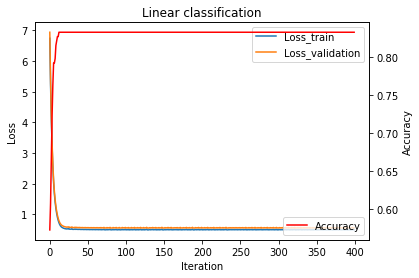

In [160]:
plt.close()
lr = 0.21
lambdal = 0.5
iteration = 400
#get different kinds of initial data（W_zeros,W_random or W_normal）
W = W_nor
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
Accuracy = np.zeros(iteration)
for j in range(0,iteration):
    W_0 = W.copy()
    W_0[N-1]= 0
    #the training loss
    Loss_train[j] = cal_Loss(X_train,W,y_train,lambdal,W_0)
    #the gradient of the loss function
    G = cal_G(X_train,W,y_train,lambdal,W_0)
    #the validation loss
    Loss_validation[j] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
    #accuracy
    Accuracy[j] = cal_Accuracy(X_validation,W,y_validation)
    #update the parameter W
    W = W - G * lr
#draw the result
draw_plot(Loss_train,Loss_validation,Accuracy)

In [161]:
plt.close()